interactive(children=(IntSlider(value=228, description='Slice', max=456), Output()), _dom_classes=('widget-int…

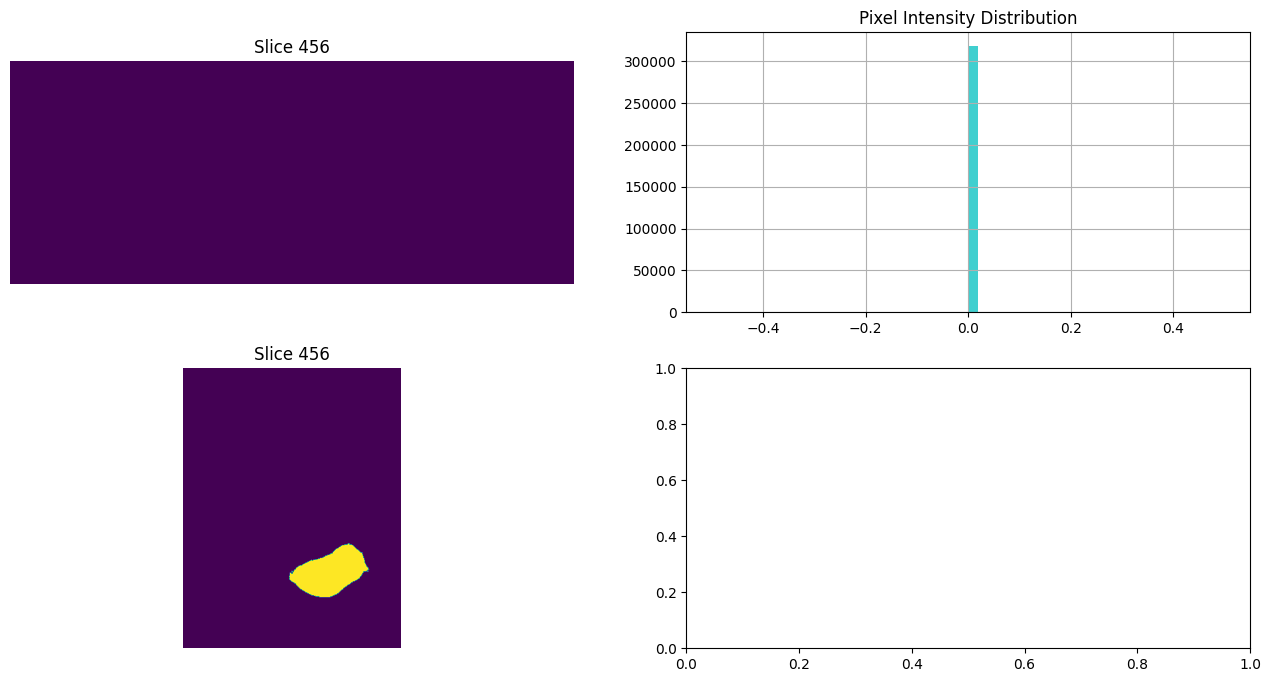

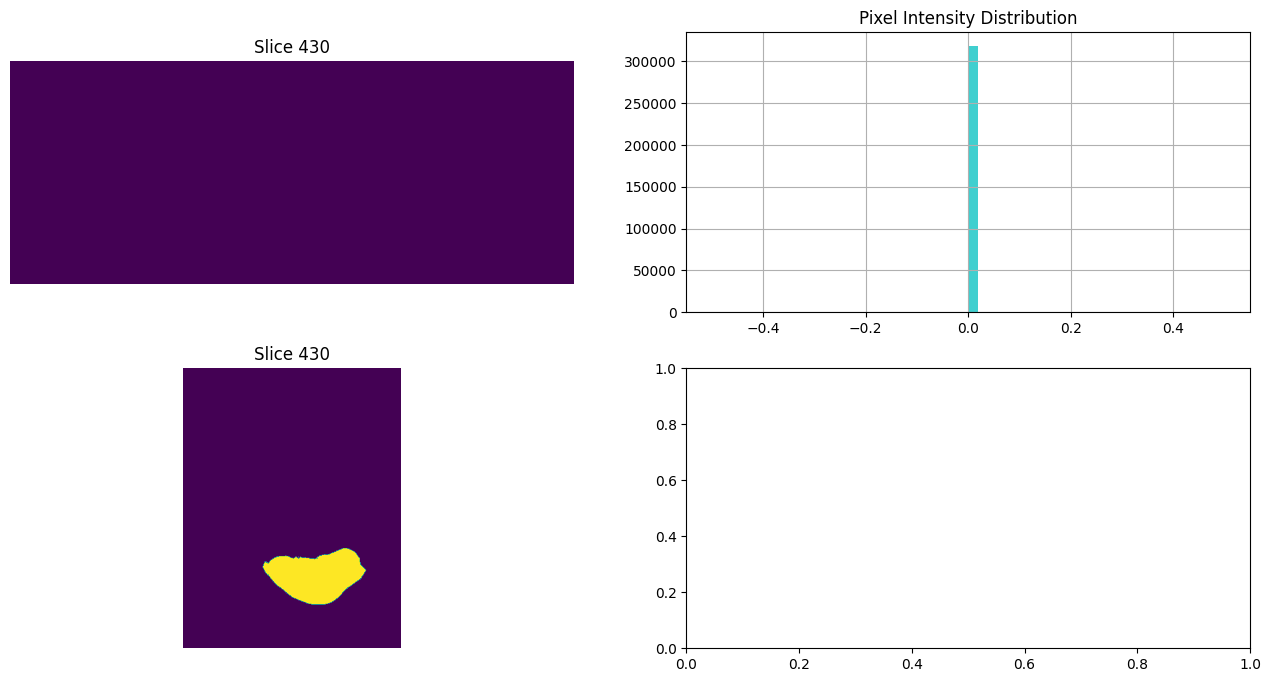

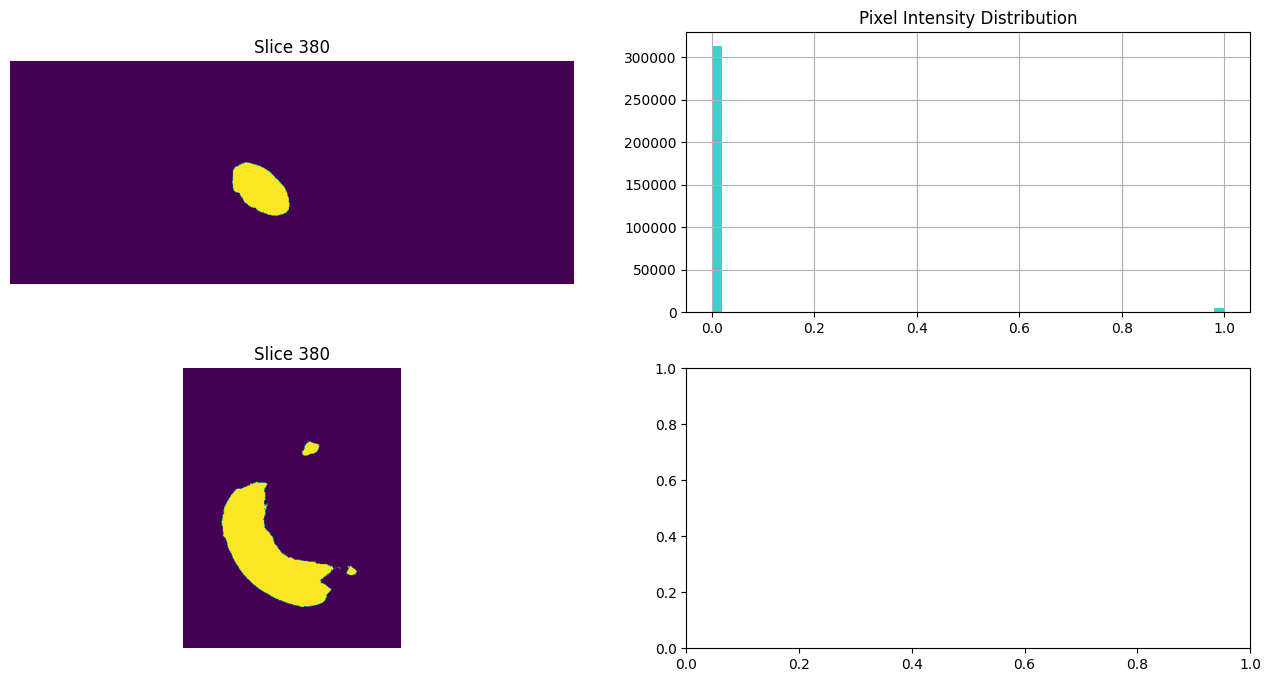

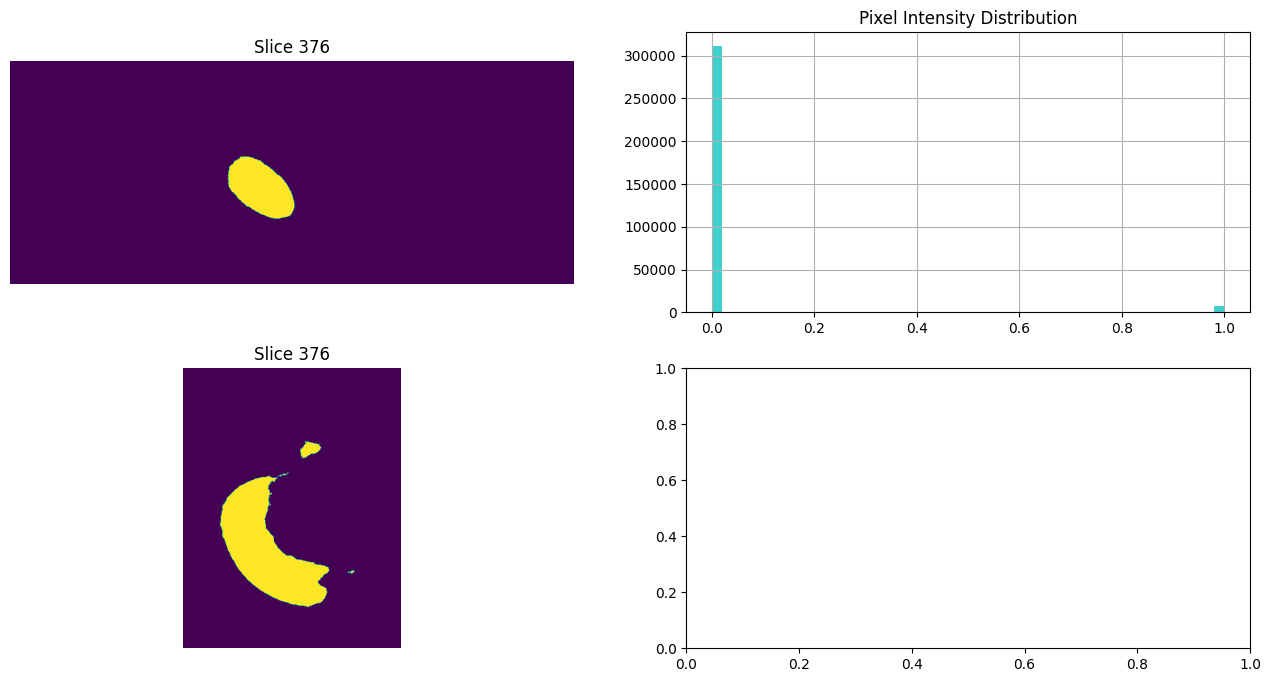

In [8]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load the NIfTI file
nifti_path = "NG4110_RCL5.nii.gz"
img = nib.load(nifti_path)
data = img.get_fdata()

# Adjusted function to display a slice and its histogram
def display_slice_and_histogram(slice_no):
    # Setup the figure and axes for a side-by-side plot: slice and histogram
    fig, axes = plt.subplots(2, 2, figsize=(16, 8))
    
    # Display the slice
    ax = axes[0,0]
    ax.imshow(data[:, :, slice_no])
    ax.axis('off')  # Hide axes ticks
    ax.set_title(f'Slice {slice_no}')
    
    # Display the histogram
    ax = axes[0,1]
    slice_data = data[:, :, slice_no].ravel()
    ax.hist(slice_data, bins=50, color='c', alpha=0.75)
    ax.set_title('Pixel Intensity Distribution')
    ax.grid(True)

    ax = axes[1,0]
    ax.imshow(data[:, slice_no,: ].T)
    ax.axis('off')  # Hide axes ticks
    ax.set_title(f'Slice {slice_no}')

    ax = axes[1,1]
    ax.imshow(data[slice_no, :,: ])
    ax.axis('off')  # Hide axes ticks
    ax.set_title(f'Slice {slice_no}')
    
    plt.tight_layout()
    plt.show()

# Interactive widget for slice selection
slice_slider = widgets.IntSlider(
    min=0, 
    max=data.shape[2] - 1, 
    step=1, 
    value=data.shape[2] // 2, 
    description='Slice'
)

widgets.interactive(display_slice_and_histogram, slice_no=slice_slider)
